In [413]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [414]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)

In [415]:
# define q-learning parameters
learning_rate = 0.5
discount_factor = 0.99
epsilon = 1.0
num_episodes = 5000
epsilon_decay = 0.001

# initialise q-table
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [416]:
# function to choose next action using epsilon-greedy policy
def choose_action(state, Q, epsilon):
    if np.random.random() < epsilon:
        action = env.action_space.sample()  # exploration
    else:
        action = np.argmax(q_table[state]) # exploitation
    return action

In [417]:
# function to update the q value based on the action taken and perceived reward
def update_q_table(state, new_state, reward, action, learning_rate, discount_factor):
    q_table[state, action] = q_table[state, action] + learning_rate * (reward + discount_factor * np.max(q_table[new_state]) - q_table[state, action])

In [418]:
# initialise list to store total rewards per episode
rewards_per_episode = []

for episode in range(num_episodes):
  state = env.reset() # reset environment for new episode
  total_rewards = 0
  done = False

  while not done:
    action = choose_action(state, q_table, epsilon) # choose action based on policy
    new_state, reward, done, info = env.step(action) # take action
    total_rewards += reward # add reward to total_rewards
    update_q_table(state, new_state, reward, action, learning_rate, discount_factor) # update q table
    state = new_state

  rewards_per_episode.append(total_rewards)
  epsilon = max(epsilon - epsilon_decay, 0)

print(q_table)

[[0.50095108 0.28479098 0.28287162 0.28186629]
 [0.19022654 0.15296049 0.15640963 0.56249411]
 [0.14118628 0.20350697 0.18242033 0.49805124]
 [0.08257227 0.20531736 0.19317209 0.49679995]
 [0.559944   0.10643156 0.20024762 0.2612365 ]
 [0.         0.         0.         0.        ]
 [0.12110605 0.00874957 0.00725997 0.00902878]
 [0.         0.         0.         0.        ]
 [0.22461895 0.25585841 0.24673634 0.63953766]
 [0.13967717 0.77780908 0.10522435 0.12695241]
 [0.77772217 0.07460199 0.06302066 0.0773512 ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.19326123 0.33092771 0.91156559 0.23846982]
 [0.48774741 0.99498838 0.45892984 0.34894832]
 [0.         0.         0.         0.        ]]


[0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.0

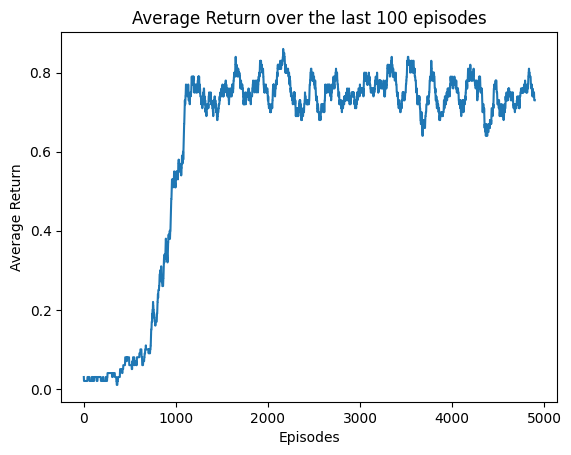

In [419]:
# calculate average returns over each 100 episode
average_return = []
for i in range(len(rewards_per_episode) - 100):
  average_return_100_episodes = np.mean(rewards_per_episode[i:i+100])
  average_return.append(average_return_100_episodes)

print(average_return)

# plot average return over last 100 episodes against episode number
plt.plot(average_return)
plt.xlabel('Episodes')
plt.ylabel('Average Return')
plt.title('Average Return over the last 100 episodes')
plt.show()